In [351]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import svm

import torch
import torch.nn as nn
from torch.autograd import Variable
import random  
import math
import time
from matplotlib import colors

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
np.random.seed(100)
torch.manual_seed(100)
random.seed(11)

In [2]:
df_full = pd.read_csv('byaddress_16feats_3targets_v1.csv')

In [3]:
df_full.shape

(25560, 20)

In [4]:
df=df_full.drop(columns=['Frequency_of_Complaints'])
df=df.dropna()
print(df.shape)

(24608, 19)


In [84]:
df.columns

Index(['address', 'year built', 'land_sf', 'gross_area', 'living_area', 'sqft',
       'num_floors', 'num_bldgs', 'units_res', 'ct_perc_disability',
       'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more',
       'Severity', 'Index_Sum'],
      dtype='object')

In [5]:
df

,address,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum
0,"1 Abbotsford St, 02121",1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,1.061571,5.000000,10
1,"1 Acorn St, 02108",1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,26.284658,8.000000,40
2,"1 Adams St, 02129",1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,25.625000,5.000000,5
3,"1 Akron Pl, 02119",1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,2.694236,5.000000,5
4,"1 Aldie St, 02134",1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,3.987847,5.000000,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25554,"992 Washington St, 02124",1935.0,4500.0,2225.0,1350.0,1350.0,2.0,1.0,1.0,12.450884,23.207269,11.738703,32.293713,44.032416,77.087426,37.940815,6.573070,4.000000,4
25556,"995 Centre St, 02130",1984.0,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,28.631139,5.000000,5
25557,"996 South St, 02131",1907.0,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,11.955056,4.666667,14
25558,"998 Tremont St, 02120",1910.0,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0,21.414729,22.835917,7.751938,61.983204,69.735142,92.474160,34.394057,1.561338,5.769231,75


### Clustering for Whole data set

In [59]:
X=df.iloc[:,1:17].to_numpy()
X.shape

(24608, 16)

In [60]:
df.iloc[:,1:17]

,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more
0,1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,1.061571
1,1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,26.284658
2,1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,25.625000
3,1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,2.694236
4,1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,3.987847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25554,1935.0,4500.0,2225.0,1350.0,1350.0,2.0,1.0,1.0,12.450884,23.207269,11.738703,32.293713,44.032416,77.087426,37.940815,6.573070
25556,1984.0,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,28.631139
25557,1907.0,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,11.955056
25558,1910.0,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0,21.414729,22.835917,7.751938,61.983204,69.735142,92.474160,34.394057,1.561338


In [64]:
feat_names = df.iloc[:,1:17].columns

In [8]:
Y_Severity= df[['Severity']].to_numpy()
Y_IndexSum= df[['Index_Sum']].to_numpy()

In [9]:
Y_Severity.max()

10.0

In [10]:
print(Y_Severity.shape, Y_IndexSum.shape)

(24608, 1) (24608, 1)


In [61]:
# we are weighing all our variables evenly
X = StandardScaler().fit_transform(X)
pca = PCA().fit(X)
components = pca.components_
print(components[0])

[ 0.01996554  0.05079908  0.09310846  0.07815939  0.07816467  0.01838881
  0.          0.05022496  0.34372477  0.32556082 -0.1296865   0.39157883
  0.37252322  0.40586439 -0.38598663 -0.35566568]


In [75]:
pca_loading0 = pd.DataFrame(list(zip(feat_names,components[0])),columns=['feat','loading'])
pca_loading0['loading'] = abs(pca_loading0['loading'])
pca_loading0 = pca_loading0.sort_values(by='loading')

In [76]:
print(pca_loading0)

                                   feat   loading
6                             num_bldgs  0.000000
5                            num_floors  0.018389
0                            year built  0.019966
7                             units_res  0.050225
1                               land_sf  0.050799
3                           living_area  0.078159
4                                  sqft  0.078165
2                            gross_area  0.093108
10                      ct_perc_over_65  0.129686
9              ct_perc_children_under_5  0.325561
8                    ct_perc_disability  0.343725
15        ct_perc_income_200000_or_more  0.355666
12  ct_perc_limited_english_proficiency  0.372523
14                  ct_perc_med_illness  0.385987
11             ct_perc_low_to_no_income  0.391579
13                          ct_perc_poc  0.405864


In [77]:
pca_loading1 = pd.DataFrame(list(zip(feat_names,components[1])),columns=['feat','loading'])
pca_loading1['loading'] = abs(pca_loading1['loading'])
pca_loading1 = pca_loading1.sort_values(by='loading')

In [78]:
print(pca_loading1)

                                   feat       loading
6                             num_bldgs  6.938894e-18
11             ct_perc_low_to_no_income  1.964546e-02
0                            year built  2.651104e-02
12  ct_perc_limited_english_proficiency  3.197123e-02
10                      ct_perc_over_65  3.467052e-02
15        ct_perc_income_200000_or_more  5.438149e-02
14                  ct_perc_med_illness  5.864349e-02
13                          ct_perc_poc  7.352932e-02
8                    ct_perc_disability  8.996818e-02
9              ct_perc_children_under_5  1.101359e-01
1                               land_sf  2.015938e-01
5                            num_floors  2.900228e-01
7                             units_res  4.053105e-01
2                            gross_area  4.703011e-01
4                                  sqft  4.766785e-01
3                           living_area  4.766806e-01


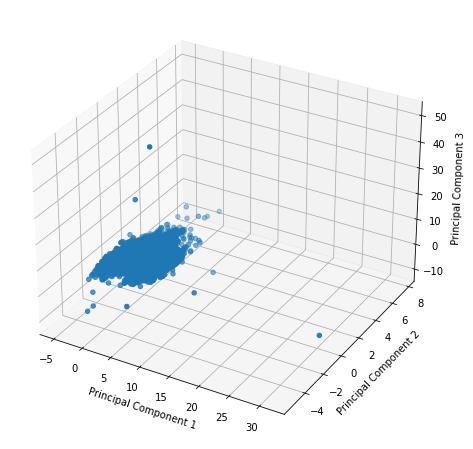

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

X_pca = pca.transform(X)
ax.scatter(X_pca[:,0], X_pca[:,5], X_pca[:,7], marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

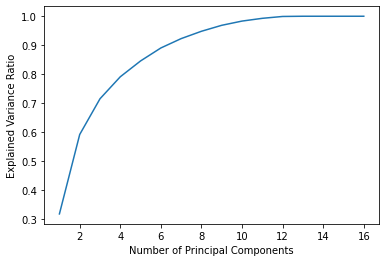

In [14]:
%matplotlib inline
plt.plot(range(1,17), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

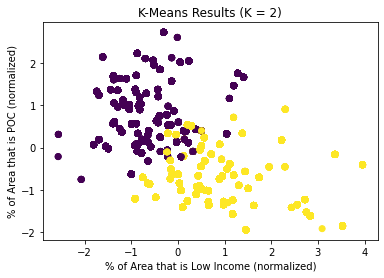

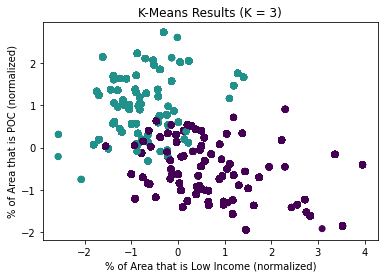

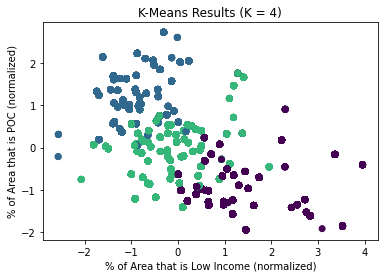

In [15]:
%matplotlib inline
for K in range(2,5):
    kmeans = KMeans(n_clusters=K).fit(X)
    plt.scatter(X[:,12], X[:,14], c=kmeans.labels_, cmap='viridis')
    #12= %low income
    #14= %POC
    plt.xlabel('% of Area that is Low Income (normalized)')
    plt.ylabel('% of Area that is POC (normalized)')
    plt.title('K-Means Results (K = ' + str(K) + ')')
    plt.show()

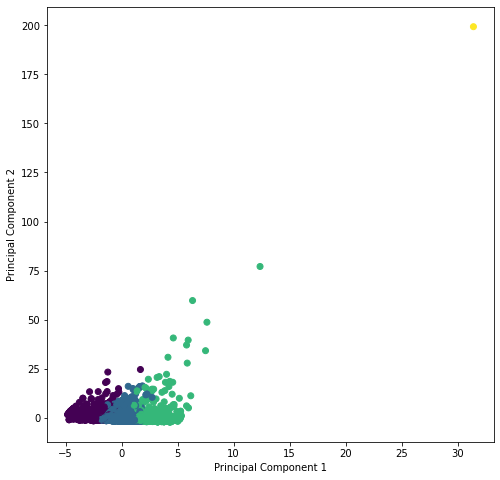

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(projection='3d')

K = 4
model = KMeans(n_clusters=K)
GMM = model.fit(X)
preds = GMM.predict(X)

X_pca = pca.transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=preds, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#ax.set_zlabel('Principal Component 3')
plt.show()

### For just demographics

In [9]:
df_ct=df.drop(columns=df.columns[1:9])

In [10]:
df_ct

,address,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum
0,"1 Abbotsford St, 02121",20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,1.061571,5.000000,10
1,"1 Acorn St, 02108",4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,26.284658,8.000000,40
2,"1 Adams St, 02129",6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,25.625000,5.000000,5
3,"1 Akron Pl, 02119",18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,2.694236,5.000000,5
4,"1 Aldie St, 02134",7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,3.987847,5.000000,35
...,...,...,...,...,...,...,...,...,...,...,...
25554,"992 Washington St, 02124",12.450884,23.207269,11.738703,32.293713,44.032416,77.087426,37.940815,6.573070,4.000000,4
25556,"995 Centre St, 02130",9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,28.631139,5.000000,5
25557,"996 South St, 02131",9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,11.955056,4.666667,14
25558,"998 Tremont St, 02120",21.414729,22.835917,7.751938,61.983204,69.735142,92.474160,34.394057,1.561338,5.769231,75


In [13]:
X_ct=df_ct.iloc[:,1:-2].to_numpy()

In [19]:
ct_feat_names = df_ct.iloc[:,1:-2].columns
ct_feat_names

Index(['ct_perc_disability', 'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more'],
      dtype='object')

In [16]:
X_ct.shape

(24608, 8)

In [31]:
X_ct = StandardScaler().fit_transform(X_ct)
pca = PCA().fit(X_ct)
components = pca.components_
print(components[0])

[ 0.35074389  0.33602841 -0.12858957  0.39363759  0.37505554  0.41178554
 -0.39199872 -0.35872109]


In [32]:
print(pd.DataFrame(list(zip(ct_feat_names,components[0])),columns=['feat','loading']).sort_values(by='loading'))

                                  feat   loading
6                  ct_perc_med_illness -0.391999
7        ct_perc_income_200000_or_more -0.358721
2                      ct_perc_over_65 -0.128590
1             ct_perc_children_under_5  0.336028
0                   ct_perc_disability  0.350744
4  ct_perc_limited_english_proficiency  0.375056
3             ct_perc_low_to_no_income  0.393638
5                          ct_perc_poc  0.411786


In [33]:
print(pd.DataFrame(list(zip(ct_feat_names,components[1])),columns=['feat','loading']).sort_values(by='loading'))

                                  feat   loading
3             ct_perc_low_to_no_income -0.071111
5                          ct_perc_poc -0.042671
7        ct_perc_income_200000_or_more  0.050736
4  ct_perc_limited_english_proficiency  0.179815
1             ct_perc_children_under_5  0.221417
6                  ct_perc_med_illness  0.320580
0                   ct_perc_disability  0.425582
2                      ct_perc_over_65  0.790757


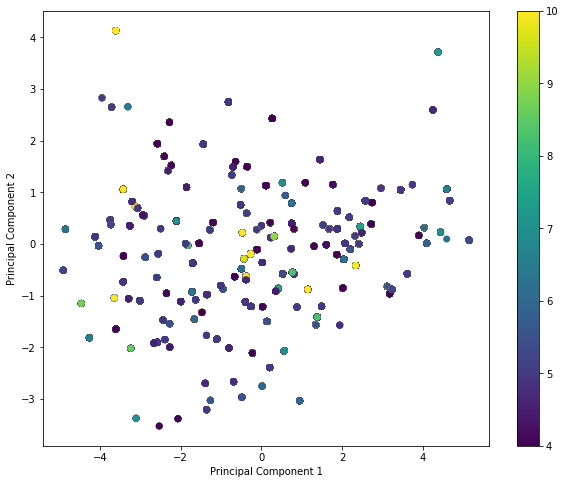

In [47]:
fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(projection='3d')

X_ct_pca = pca.transform(X_ct)
plt.scatter(X_ct_pca[:,0], X_ct_pca[:,1],  marker='o',c=df_ct.Severity)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
plt.colorbar()
plt.show()

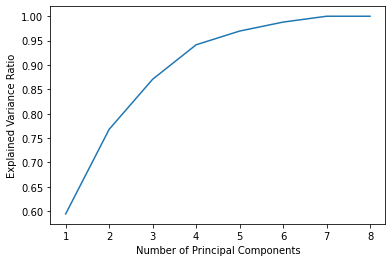

In [41]:
plt.plot(range(1,9), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

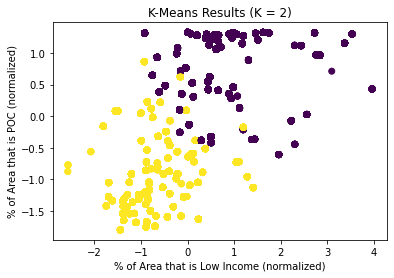

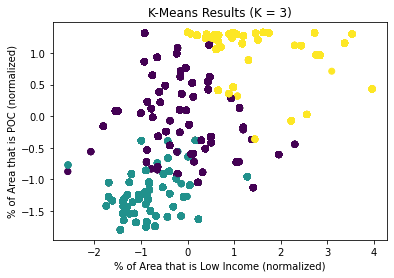

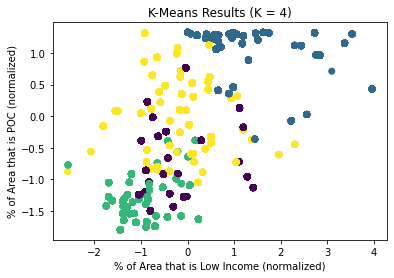

In [22]:
%matplotlib inline
for K in range(2,5):
    kmeans = KMeans(n_clusters=K).fit(X_ct)
    plt.scatter(X_ct[:,4], X_ct[:,5], c=kmeans.labels_, cmap='viridis')
    #12= %low income
    #14= %POC
    plt.xlabel('% of Area that is Low Income (normalized)')
    plt.ylabel('% of Area that is POC (normalized)')
    plt.title('K-Means Results (K = ' + str(K) + ')')
    plt.show()

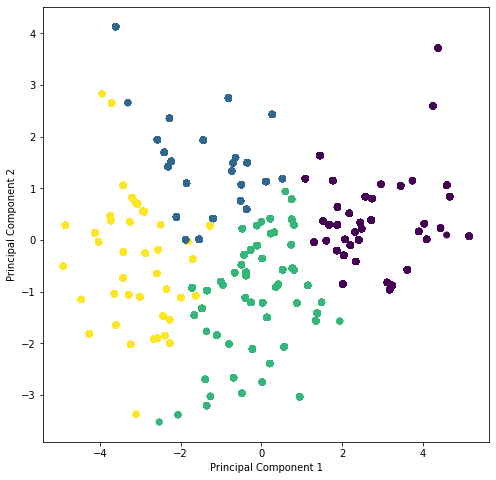

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(projection='3d')

K = 4
model = KMeans(n_clusters=K)
kmeans = model.fit(X_ct)
preds = kmeans.predict(X_ct)

# X_ct_pca = pca.transform(X_ct)
plt.scatter(X_ct_pca[:,0], X_ct_pca[:,1], c=preds, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#ax.set_zlabel('Principal Component 3')
plt.show()

In [24]:
model.labels_

array([0, 3, 3, ..., 1, 0, 1], dtype=int32)

In [25]:
df_ct

,address,year built,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum
0,"1 Abbotsford St, 02121",1900.0,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,1.061571,5.000000,10
1,"1 Acorn St, 02108",1829.0,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,26.284658,8.000000,40
2,"1 Adams St, 02129",1857.0,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,25.625000,5.000000,5
3,"1 Akron Pl, 02119",1890.0,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,2.694236,5.000000,5
4,"1 Aldie St, 02134",1890.0,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,3.987847,5.000000,35
...,...,...,...,...,...,...,...,...,...,...,...,...
25554,"992 Washington St, 02124",1935.0,12.450884,23.207269,11.738703,32.293713,44.032416,77.087426,37.940815,6.573070,4.000000,4
25556,"995 Centre St, 02130",1984.0,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,28.631139,5.000000,5
25557,"996 South St, 02131",1907.0,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,11.955056,4.666667,14
25558,"998 Tremont St, 02120",1910.0,21.414729,22.835917,7.751938,61.983204,69.735142,92.474160,34.394057,1.561338,5.769231,75


In [26]:
df_ct['Cluster']=model.labels_

In [27]:
df_ct.groupby('Cluster')['Severity'].mean()

Cluster
0    5.536036
1    5.734413
2    5.619649
3    5.692768
Name: Severity, dtype: float64

In [28]:
df_ct.corr()['Severity']

year built                             0.018328
ct_perc_disability                    -0.020606
ct_perc_children_under_5               0.003369
ct_perc_over_65                        0.066413
ct_perc_low_to_no_income              -0.057016
ct_perc_limited_english_proficiency   -0.038910
ct_perc_poc                           -0.055019
ct_perc_med_illness                    0.042762
ct_perc_income_200000_or_more          0.048908
Severity                               1.000000
Index_Sum                              0.004332
Cluster                                0.023979
Name: Severity, dtype: float64

In [29]:
df_ct_clusters=df_ct.groupby('Cluster').mean()

In [30]:
df_ct_clusters

,year built,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum
Cluster,,,,,,,,,,,
0,1913.741570,17.488862,28.652427,10.107649,41.670797,51.778446,91.696597,35.745906,3.145354,5.536036,28.946691
1,1920.451524,13.362256,18.423141,16.582907,16.492297,33.075203,37.915494,40.397982,8.871063,5.734413,16.752770
2,1913.496175,10.487738,17.767916,8.152386,26.952407,35.104793,61.763762,37.248995,5.566259,5.619649,26.785101
3,1904.426813,6.174057,12.596270,10.942736,14.478311,25.421047,16.208277,41.036316,21.045043,5.692768,29.119387


In [31]:
df['Cluster']=model.labels_

In [32]:
df

,address,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum,Cluster
0,"1 Abbotsford St, 02121",1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,1.061571,5.000000,10,0
1,"1 Acorn St, 02108",1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,26.284658,8.000000,40,3
2,"1 Adams St, 02129",1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,25.625000,5.000000,5,3
3,"1 Akron Pl, 02119",1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,2.694236,5.000000,5,0
4,"1 Aldie St, 02134",1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,3.987847,5.000000,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25554,"992 Washington St, 02124",1935.0,4500.0,2225.0,1350.0,1350.0,2.0,1.0,1.0,12.450884,23.207269,11.738703,32.293713,44.032416,77.087426,37.940815,6.573070,4.000000,4,2
25556,"995 Centre St, 02130",1984.0,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,28.631139,5.000000,5,3
25557,"996 South St, 02131",1907.0,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,11.955056,4.666667,14,1
25558,"998 Tremont St, 02120",1910.0,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0,21.414729,22.835917,7.751938,61.983204,69.735142,92.474160,34.394057,1.561338,5.769231,75,0


In [33]:
df_clusters=df.groupby('Cluster').mean()
df_clusters

,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum
Cluster,,,,,,,,,,,,,,,,,,
0,1913.741570,4349.207430,4785.011963,3120.424164,3120.650833,2.464880,1.0,2.344410,17.488862,28.652427,10.107649,41.670797,51.778446,91.696597,35.745906,3.145354,5.536036,28.946691
1,1920.451524,5481.349261,3981.168513,2528.391505,2528.391505,2.068502,1.0,1.954986,13.362256,18.423141,16.582907,16.492297,33.075203,37.915494,40.397982,8.871063,5.734413,16.752770
2,1913.496175,4220.799007,4461.117277,2964.923542,2965.629556,2.406183,1.0,2.639932,10.487738,17.767916,8.152386,26.952407,35.104793,61.763762,37.248995,5.566259,5.619649,26.785101
3,1904.426813,3170.244387,4064.668610,2909.434909,2909.767055,2.771265,1.0,2.570164,6.174057,12.596270,10.942736,14.478311,25.421047,16.208277,41.036316,21.045043,5.692768,29.119387


### For just buildings

In [34]:
# one more KNN with building features. 
# is there a relationship between building features and rental index/ct data. 

In [49]:
df_building=df.drop(columns=df.columns[9:17])
df_building

,address,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,Severity,Index_Sum
0,"1 Abbotsford St, 02121",1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,5.000000,10
1,"1 Acorn St, 02108",1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,8.000000,40
2,"1 Adams St, 02129",1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,5.000000,5
3,"1 Akron Pl, 02119",1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,5.000000,5
4,"1 Aldie St, 02134",1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,5.000000,35
...,...,...,...,...,...,...,...,...,...,...,...
25554,"992 Washington St, 02124",1935.0,4500.0,2225.0,1350.0,1350.0,2.0,1.0,1.0,4.000000,4
25556,"995 Centre St, 02130",1984.0,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0,5.000000,5
25557,"996 South St, 02131",1907.0,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0,4.666667,14
25558,"998 Tremont St, 02120",1910.0,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0,5.769231,75


In [50]:
X_build=df_building.iloc[:,2:9]
X_build

,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res
0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0
1,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0
2,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0
3,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0
4,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0
...,...,...,...,...,...,...,...
25554,4500.0,2225.0,1350.0,1350.0,2.0,1.0,1.0
25556,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0
25557,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0
25558,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0


In [53]:
# we are weighing all our variables evenly
X_build = StandardScaler().fit_transform(X_build)
pca = PCA().fit(X_build)
# components = pca.components_
# print(components[0])

In [56]:
feat_names_build = df_building.iloc[:,2:9].columns

In [57]:
print(pd.DataFrame(list(zip(feat_names_build,components[0])),columns=['feat','loading']).sort_values(by='loading'))

          feat   loading
5    num_bldgs  0.000000
0      land_sf  0.221547
4   num_floors  0.278798
6    units_res  0.408232
1   gross_area  0.483326
2  living_area  0.486277
3         sqft  0.486278


In [58]:
print(pd.DataFrame(list(zip(feat_names_build,components[1])),columns=['feat','loading']).sort_values(by='loading'))

          feat   loading
4   num_floors -0.651615
6    units_res -0.084301
5    num_bldgs -0.000000
3         sqft  0.020131
2  living_area  0.020137
1   gross_area  0.062446
0      land_sf  0.750720


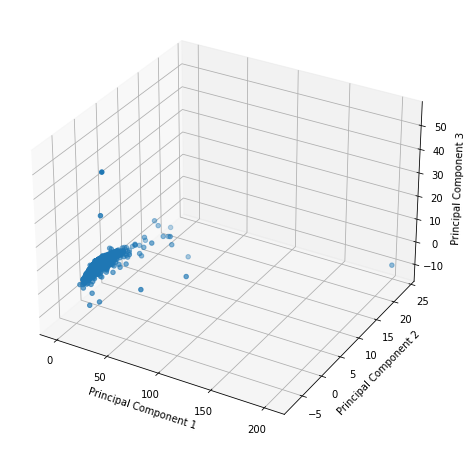

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

X_build_pca = pca.transform(X_build)
ax.scatter(X_build_pca[:,0], X_build_pca[:,1], X_build_pca[:,2], marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

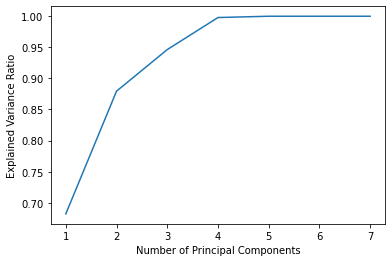

In [48]:
%matplotlib inline
plt.plot(range(1,8), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

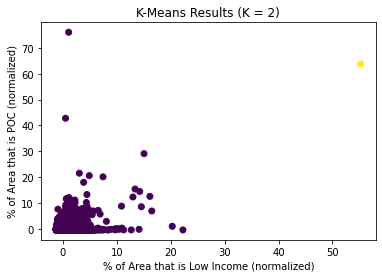

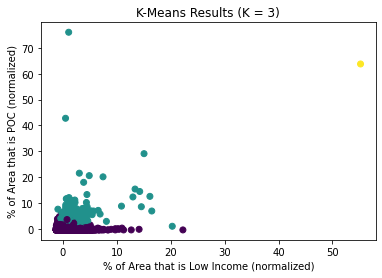

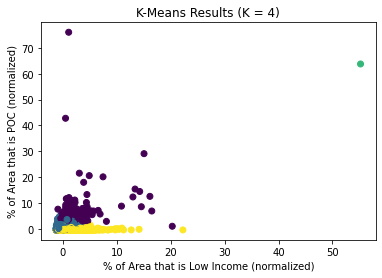

In [49]:
%matplotlib inline
for K in range(2,5):
    kmeans = KMeans(n_clusters=K).fit(X_build)
    plt.scatter(X_build[:,0], X_build[:,6], c=kmeans.labels_, cmap='viridis')
    #0= Land 
    #6= # of residential units
    plt.xlabel('% of Area that is Low Income (normalized)')
    plt.ylabel('% of Area that is POC (normalized)')
    plt.title('K-Means Results (K = ' + str(K) + ')')
    plt.show()

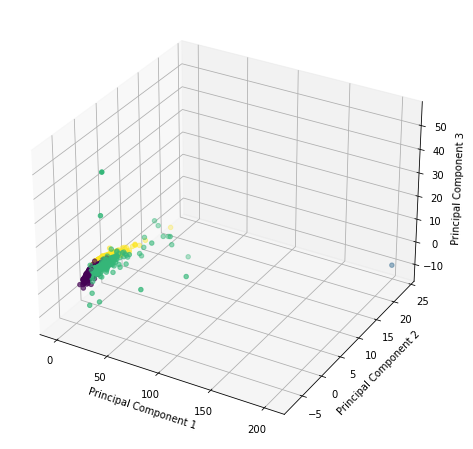

In [51]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

K = 4
model = KMeans(n_clusters=K)
GMM = model.fit(X_build)
preds = GMM.predict(X_build)

X_build_pca = pca.transform(X_build)
ax.scatter(X_build_pca[:,0], X_build_pca[:,1], X_build_pca[:,2], c=preds, cmap='viridis', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

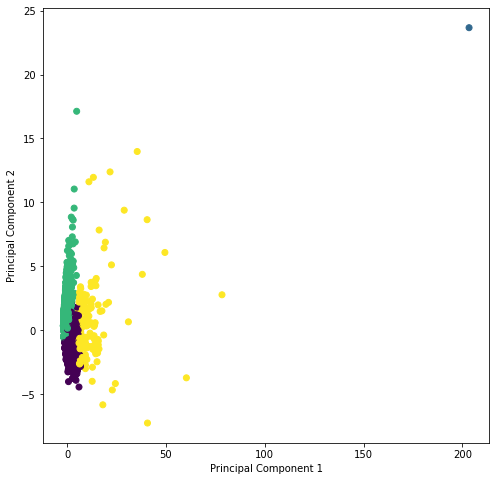

In [52]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(projection='3d')

K = 4
model = KMeans(n_clusters=K)
GMM = model.fit(X_build)
preds = GMM.predict(X_build)

X_build_pca = pca.transform(X_build)
plt.scatter(X_build_pca[:,0], X_build_pca[:,1], c=preds, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#ax.set_zlabel('Principal Component 3')
plt.show()

In [53]:
df_building['Cluster']=model.labels_

In [61]:
df_building

,address,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,Severity,Index_Sum,Cluster
0,"1 Abbotsford St, 02121",1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,5.000000,10,2
1,"1 Acorn St, 02108",1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,8.000000,40,0
2,"1 Adams St, 02129",1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,5.000000,5,0
3,"1 Akron Pl, 02119",1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,5.000000,5,2
4,"1 Aldie St, 02134",1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,5.000000,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...
25554,"992 Washington St, 02124",1935.0,4500.0,2225.0,1350.0,1350.0,2.0,1.0,1.0,4.000000,4,2
25556,"995 Centre St, 02130",1984.0,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0,5.000000,5,2
25557,"996 South St, 02131",1907.0,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0,4.666667,14,2
25558,"998 Tremont St, 02120",1910.0,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0,5.769231,75,0


In [62]:
df_building.Cluster.value_counts()

2    13569
0    10833
3      205
1        1
Name: Cluster, dtype: int64

In [54]:
df_building.groupby('Cluster')['Severity'].mean()

Cluster
0    5.538486
1    9.000000
2    5.702842
3    5.547769
Name: Severity, dtype: float64

In [55]:
df_building.corr()['Severity']

year built     0.018328
land_sf        0.001462
gross_area    -0.015744
living_area   -0.012078
sqft          -0.012125
num_floors    -0.045816
num_bldgs           NaN
units_res     -0.019192
Severity       1.000000
Index_Sum      0.004332
Cluster        0.043516
Name: Severity, dtype: float64

In [57]:
df_building_clusters=df_building.groupby('Cluster').mean()

In [58]:
df_building_clusters

,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,Severity,Index_Sum
Cluster,,,,,,,,,,
0,1904.980522,3030.307025,5060.250992,3567.180652,3567.593003,3.050678,1.0,3.090557,5.538486,34.460999
1,1964.000000,174782.000000,445701.000000,398510.000000,398510.000000,29.000000,1.0,273.000000,9.000000,54.000000
2,1919.260299,5162.202938,3505.615668,2091.035252,2091.380930,1.911127,1.0,1.458472,5.702842,18.672931
3,1932.331707,11364.204878,26085.180488,21995.541463,21995.541463,4.146341,1.0,29.356098,5.547769,74.078049


### Add loc

In [156]:
df_addloc = pd.read_csv('byaddress_addlocvars.csv')

In [157]:
df_addloc

,address,Severity,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,...,ct_perc_med_illness,ct_perc_income_200000_or_more,latitude,longitude,zip_code,neighborhood,street_full,parcel,Index_Sum,Frequency_of_Complaints
0,"1 Abbotsford St, 02121",5.000000,1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,...,37.262921,1.061571,42.31465,-71.09318,2121,Dorchester,ABBOTSFORD ST,1203002000,10,0.024213
1,"1 Acorn St, 02108",8.000000,1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,...,42.477701,26.284658,42.35761,-71.06857,2108,Boston,ACORN ST,501530000,40,0.061538
2,"1 Adams St, 02129",5.000000,1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,...,42.309963,25.625000,42.37484,-71.06004,2129,Charlestown,ADAMS ST,203373000,5,inf
3,"1 Akron Pl, 02119",5.000000,1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,...,36.766230,2.694236,42.32572,-71.08477,2119,Roxbury,AKRON PL,1201336000,5,inf
4,"1 Aldie St, 02134",5.000000,1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,...,36.923550,3.987847,42.35913,-71.13683,2134,Allston,ALDIE ST,2201264000,35,0.025253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25555,"994 River St, 02136",5.222222,1925.0,5002.0,3842.0,2356.0,3842.0,2.0,1.0,NaN,...,38.872767,2.724043,42.26072,-71.11465,2136,Hyde Park,RIVER ST,1804421000,47,0.033571
25556,"995 Centre St, 02130",5.000000,1984.0,13357.0,4596.0,3042.0,3042.0,1.0,1.0,1.0,...,43.445172,28.631139,42.30670,-71.12455,2130,Jamaica Plain,CENTRE ST,1902502010,5,inf
25557,"996 South St, 02131",4.666667,1907.0,5068.0,4894.0,3116.0,3116.0,2.5,1.0,2.0,...,42.887532,11.955056,42.28745,-71.13991,2131,Roslindale,SOUTH ST,2005587000,14,0.019802
25558,"998 Tremont St, 02120",5.769231,1910.0,1875.0,6705.0,5364.0,5364.0,4.0,1.0,4.0,...,34.394057,1.561338,42.33669,-71.08429,2120,Mission Hill,TREMONT ST,901931000,75,0.065217


In [158]:
df_addloc = df_addloc.drop(columns=['Frequency_of_Complaints'])

In [159]:
cat_vars = ['zip_code','neighborhood','street_full','parcel']

In [160]:
df_addloc[cat_vars] = df_addloc[cat_vars].astype('category')

In [161]:
df_addloc.dtypes

address                                  object
Severity                                float64
year built                              float64
land_sf                                 float64
gross_area                              float64
living_area                             float64
sqft                                    float64
num_floors                              float64
num_bldgs                               float64
units_res                               float64
ct_perc_disability                      float64
ct_perc_children_under_5                float64
ct_perc_over_65                         float64
ct_perc_low_to_no_income                float64
ct_perc_limited_english_proficiency     float64
ct_perc_poc                             float64
ct_perc_med_illness                     float64
ct_perc_income_200000_or_more           float64
latitude                                float64
longitude                               float64
zip_code                               c

In [162]:
df_addloc[cat_vars].nunique()

zip_code           27
neighborhood       15
street_full      2211
parcel          25543
dtype: int64

In [163]:
#drop parcel

In [164]:
df_addloc = df_addloc.drop(columns=['parcel'])

In [165]:
cat_vars = ['zip_code','neighborhood','street_full']

In [166]:
one_hot_enc = pd.get_dummies(df_addloc[cat_vars])

In [167]:
df_addloc = df_addloc.drop(columns=cat_vars)

In [168]:
df_addloc = df_addloc.merge(one_hot_enc,left_index=True,right_index=True)

In [169]:
df_addloc = df_addloc.replace([np.inf,-np.inf],np.nan).dropna()

In [179]:
df_addloc = df_addloc.loc[:, (df_addloc != 0).any(axis=0)]

In [170]:
aux_cols = df_addloc[['address','Severity','Index_Sum']].copy()

In [171]:
df_addloc = df_addloc.drop(columns=['address','Severity','Index_Sum'])

In [172]:
df_addloc.columns[:20]

Index(['year built', 'land_sf', 'gross_area', 'living_area', 'sqft',
       'num_floors', 'num_bldgs', 'units_res', 'ct_perc_disability',
       'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more',
       'latitude', 'longitude', 'zip_code_2108', 'zip_code_2109'],
      dtype='object')

In [173]:
df_addloc.shape

(24608, 2271)

In [180]:
df_addloc.shape

(24608, 2229)

In [181]:
X_addloc = df_addloc.to_numpy()
X_addloc

array([[ 1900.,  3577.,  5528., ...,     0.,     0.,     0.],
       [ 1829.,   822.,  2939., ...,     0.,     0.,     0.],
       [ 1857.,  1056.,  4093., ...,     0.,     0.,     0.],
       ...,
       [ 1907.,  5068.,  4894., ...,     0.,     0.,     0.],
       [ 1910.,  1875.,  6705., ...,     0.,     0.,     0.],
       [ 1926., 11376.,  4398., ...,     0.,     0.,     0.]])

In [182]:
X_addloc.dtype

dtype('float64')

In [183]:
feat_names = df_addloc.columns

In [184]:
# we are weighing all our variables evenly
X_addloc = StandardScaler().fit_transform(X_addloc)
pca = PCA().fit(X_addloc)
components = pca.components_
print(components[0])

[-0.01253617 -0.02171715 -0.02885152 ...  0.0046123  -0.00318086
  0.00347472]


In [185]:
pca_loading0 = pd.DataFrame(list(zip(feat_names,components[0])),columns=['feat','loading'])
pca_loading0['loading'] = abs(pca_loading0['loading'])
pca_loading0 = pca_loading0.sort_values(by='loading')

In [186]:
print(pca_loading0)

                               feat       loading
6                         num_bldgs  2.775558e-17
1153       street_full_JALLEISON ST  7.443466e-07
1484          street_full_MORLEY ST  5.459599e-06
818        street_full_FIELDMONT ST  8.860741e-06
339          street_full_BRIGHAM ST  1.297060e-05
...                             ...           ...
8                ct_perc_disability  2.805851e-01
11         ct_perc_low_to_no_income  2.818556e-01
15    ct_perc_income_200000_or_more  2.859124e-01
14              ct_perc_med_illness  3.116637e-01
13                      ct_perc_poc  3.374922e-01

[2229 rows x 2 columns]


### v 2.2

In [446]:
df_2 = pd.read_csv('byaddress_v2_2.csv')

In [447]:
df_2

,address,Severity,census_tract_number,living_area,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,...,ac_C,ac_D,ac_N,flood_f,flood_t,stormwater_f,stormwater_t,Severity_class,Severity_class_v2,poc_CT
0,"1 Abbotsford St, 02121",5.000000,2.502508e+10,3109.0,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,1
1,"1 Acorn St, 02108",8.000000,2.502502e+10,2300.0,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1,0
2,"1 Adams St, 02129",5.000000,2.502504e+10,3843.0,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0
3,"1 Akron Pl, 02119",5.000000,2.502508e+10,1200.0,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,1
4,"1 Aldie St, 02134",5.000000,2.502500e+10,2623.0,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25532,"994 River St, 02136",5.222222,2.502514e+10,2356.0,15.402695,14.102162,15.919774,21.325603,37.245378,81.447822,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0
25533,"995 Centre St, 02130",5.000000,2.502512e+10,3042.0,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
25534,"996 South St, 02131",4.666667,2.502511e+10,3116.0,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
25535,"998 Tremont St, 02120",5.769231,2.502508e+10,5364.0,21.414729,22.835917,7.751938,61.983204,69.735142,92.474160,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1


In [448]:
df_2.columns

Index(['address', 'Severity', 'census_tract_number', 'living_area',
       'ct_perc_disability', 'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more',
       'sqft_class_code', 'ext_cond_list_code', 'year_built_class_code',
       'building_subtypology_Garage, 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1950-1979',
       'building_subtypology_Multi-Family (2 units), 1980-present',
       'building_subtypology_Multi-Family (2 units), Pre-1915',
       'building_subtypology_Multi-Family (3 units), 1915-1949',
       'building_subtypology_Multi-Family (3 units), 1950-1979',
       'building_subtypology_Multi-Family (3 units), 1980-present',
       'building_subtypology_Multi-Family (3 units), Pre-1915',
       'building_subtypology_Multi-Family (31-99 units), 1

In [449]:
# df_2 = df_2.drop(columns=['Frequency_of_Complaints'])

In [450]:
df_2 = df_2.drop(columns=['address','Severity','census_tract_number','Severity_class','Severity_class_v2','flood_f','stormwater_f'])

In [232]:
# ct = pd.get_dummies(df_2.census_tract_number.astype(str))

In [233]:
# df_2 = df_2.merge(ct,left_index = True,right_index=True)

In [451]:
feat_names_2 = df_2.columns

In [452]:
X_2 = df_2.to_numpy()

In [453]:
# we are weighing all our variables evenly
X_2 = StandardScaler().fit_transform(X_2)
pca = PCA().fit(X_2)
components = pca.components_
print(components[0])

[ 1.62245786e-02 -3.18962397e-01 -3.10465696e-01  1.00476257e-01
 -3.27492595e-01 -3.13447569e-01 -3.74048834e-01  3.44052964e-01
  3.21656505e-01  2.40786774e-02 -1.08336301e-01  3.90517038e-02
  4.57589485e-03 -7.31642440e-03  6.33897491e-03 -1.63337088e-02
 -3.52242575e-02 -3.72374894e-02  2.66759980e-03 -8.51518932e-04
 -1.30415122e-01  5.80589854e-03  5.12457465e-03  9.40618927e-03
  8.54710101e-03  1.74047320e-02  8.15480307e-03  7.92012394e-03
  6.35288676e-02  2.36317660e-02  6.29223557e-03  1.38973303e-02
  7.85822791e-02  2.19640064e-03  5.04865148e-03 -8.11408125e-03
  3.64609140e-03  1.30338448e-03  8.19621639e-03  1.73732685e-03
  1.17500964e-03  2.32639549e-03  1.59527479e-02  1.18050735e-03
  7.87865074e-04  5.10133570e-03  4.81746588e-03  8.95059902e-04
  8.35085627e-04  4.73822139e-02  3.59092780e-02  1.38792680e-02
  6.14332501e-02  3.87661200e-03  1.14626750e-03  4.43126716e-05
 -3.34008159e-02  6.49374148e-02  3.22193543e-02  1.08192501e-02
 -1.16067329e-03  5.70467

In [459]:
len(components)

82

In [454]:
pca_loading0 = pd.DataFrame(list(zip(feat_names_2,components[0])),columns=['feat','loading'])
pca_loading0['loading'] = abs(pca_loading0['loading'])
pca_loading0 = pca_loading0.sort_values(by='loading',ascending=False)

In [455]:
print(pca_loading0.head(5))

                            feat   loading
6                    ct_perc_poc  0.374049
7            ct_perc_med_illness  0.344053
4       ct_perc_low_to_no_income  0.327493
8  ct_perc_income_200000_or_more  0.321657
1             ct_perc_disability  0.318962


In [456]:
pca_loading1 = pd.DataFrame(list(zip(feat_names_2,components[1])),columns=['feat','loading'])
pca_loading1['loading'] = abs(pca_loading1['loading'])
pca_loading1 = pca_loading1.sort_values(by='loading',ascending=False)

In [457]:
print(pca_loading1.head(5))

                  feat   loading
78                ac_N  0.415445
10  ext_cond_list_code  0.384813
75          heat_typ_W  0.382626
0          living_area  0.237814
9      sqft_class_code  0.196917


In [466]:
pca_loading2 = pd.DataFrame(list(zip(feat_names_2,components[2])),columns=['feat','loading'])
pca_loading2['loading'] = abs(pca_loading2['loading'])
pca_loading2 = pca_loading2.sort_values(by='loading',ascending=False)

In [468]:
print(pca_loading2.head(5))

                                                 feat   loading
11                              year_built_class_code  0.539856
51   building_subtypology_Single-Family, 1980-present  0.300594
3                                     ct_perc_over_65  0.247863
20  building_subtypology_Multi-Family (3 units), P...  0.237287
50      building_subtypology_Single-Family, 1950-1979  0.232980


In [481]:
pca_loading_16 = pd.DataFrame(list(zip(feat_names_2,components[-16])),columns=['feat','loading'])
pca_loading_16['loading'] = abs(pca_loading_16['loading'])
pca_loading_16 = pca_loading_16.sort_values(by='loading',ascending=False)

In [482]:
print(pca_loading_16.head(5))

                                                 feat   loading
58                                          ext_fin_C  0.427052
59                                          ext_fin_F  0.309532
51   building_subtypology_Single-Family, 1980-present  0.296197
19  building_subtypology_Multi-Family (3 units), 1...  0.283075
15  building_subtypology_Multi-Family (2 units), 1...  0.269760


In [485]:
pca_loading_16 = pd.DataFrame(list(zip(feat_names_2,components[-22])),columns=['feat','loading'])
pca_loading_16['loading'] = abs(pca_loading_16['loading'])
pca_loading_16 = pca_loading_16.sort_values(by='loading',ascending=False)

In [486]:
print(pca_loading_16.head(5))

                                                 feat   loading
73                                         heat_typ_P  0.516151
77                                               ac_D  0.400276
72                                         heat_typ_O  0.290520
32  building_subtypology_Multi-Family (7-30 units)...  0.198639
80                                       stormwater_t  0.185527


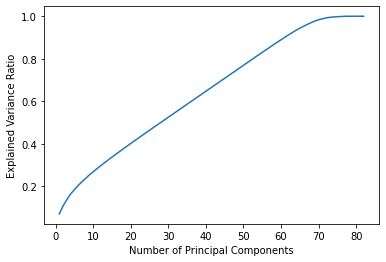

In [460]:

plt.plot(range(1,82+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [465]:
np.cumsum(pca.explained_variance_ratio_)[60]

0.900860470594292

In [328]:
X_2_pca = pca.transform(X_2)


In [363]:
cmap = matplotlib.colors.ListedColormap(['lightgreen', 'blue'])

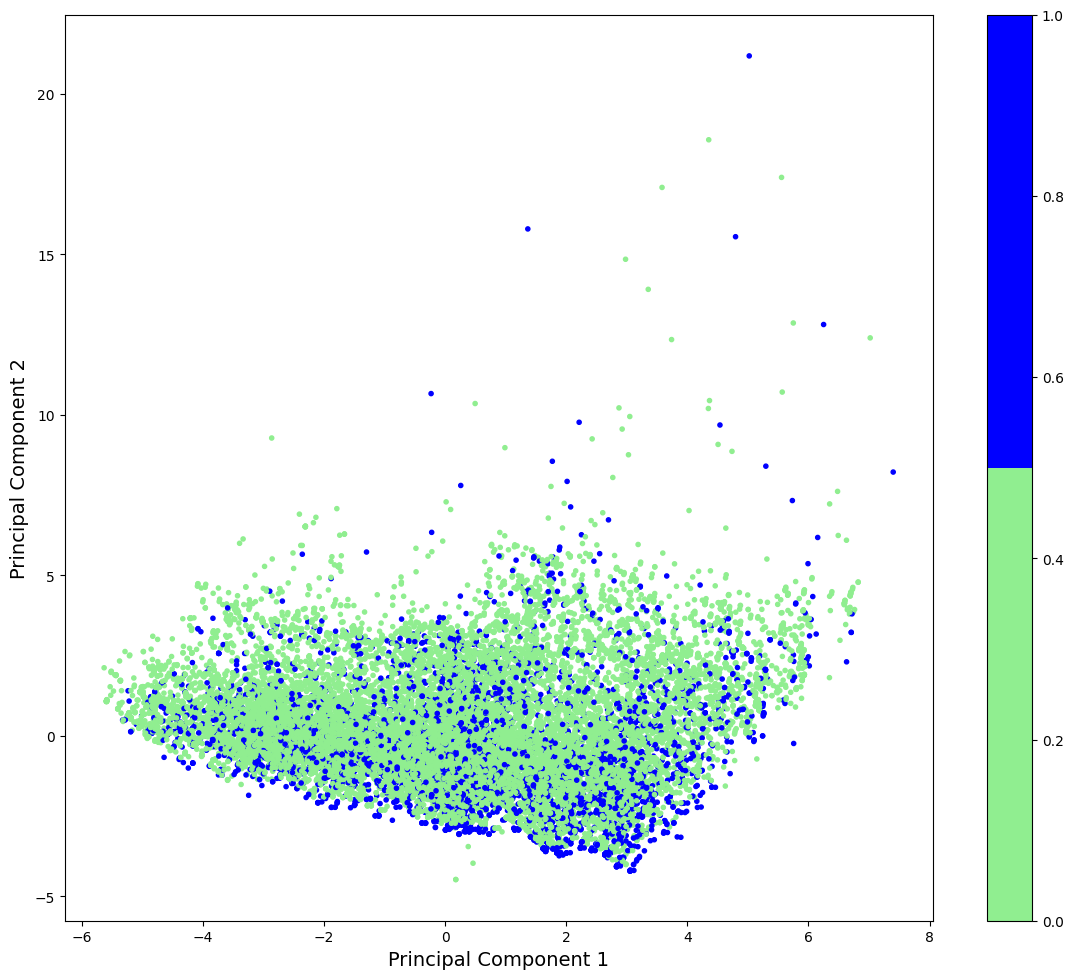

In [387]:
plt.figure(figsize=(14, 12), dpi=100)
plt.scatter(X_2_pca[:,0], X_2_pca[:,1], c=df_2['Severity'] > 7, cmap=cmap, marker='o',s=9)
plt.xlabel('Principal Component 1',fontsize=14)
plt.ylabel('Principal Component 2',fontsize=14)
plt.colorbar()
# ax.set_zlabel('Principal Component 3')
plt.savefig('pca.png')
plt.show()

In [276]:
df_0 = pd.read_csv('Index Rent Smart_v2.csv')

/Users/bhavanian/myenvs/housing/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (57,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [289]:
df_0 = df_0[['address','latitude','longitude']].groupby('address').mean()

In [290]:
df_0.shape

(25560, 2)

In [294]:
df_0 = df_0.reset_index()

In [295]:
df_3 = pd.read_csv('byaddress_v2_2.csv')

In [296]:
df_3.shape

(25537, 89)

In [298]:
df_3 = df_3.merge(df_0[['address','latitude','longitude']],on='address',how='left')

In [299]:
df_3 = df_3.drop(columns=['address','census_tract_number','ct_perc_disability',
       'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more','Severity_class', 'Severity_class_v2', 'poc_CT'])

In [300]:
df_3.columns

Index(['Severity', 'living_area', 'sqft_class_code', 'ext_cond_list_code',
       'year_built_class_code', 'building_subtypology_Garage, 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1950-1979',
       'building_subtypology_Multi-Family (2 units), 1980-present',
       'building_subtypology_Multi-Family (2 units), Pre-1915',
       'building_subtypology_Multi-Family (3 units), 1915-1949',
       'building_subtypology_Multi-Family (3 units), 1950-1979',
       'building_subtypology_Multi-Family (3 units), 1980-present',
       'building_subtypology_Multi-Family (3 units), Pre-1915',
       'building_subtypology_Multi-Family (31-99 units), 1915-1949',
       'building_subtypology_Multi-Family (31-99 units), 1950-1979',
       'building_subtypology_Multi-Family (31-99 units), 1980-present',
       'building_subtypology_Multi-Family (31-99 units), Pre-1915',
       'building_subtypology_Multi-Family (4-6 un

In [301]:
X_3 = df_3.iloc[:,:-2].to_numpy()

In [304]:
feat_names_3 = df_3.iloc[:,:-2].columns

In [305]:
# we are weighing all our variables evenly
X_3 = StandardScaler().fit_transform(X_3)
# pca = PCA().fit(X_3)
# components = pca.components_
# print(components[0])

In [306]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(projection='3d')

K = 4
model = KMeans(n_clusters=K)
GMM = model.fit(X_3)
preds = GMM.predict(X_3)



<Figure size 576x576 with 0 Axes>

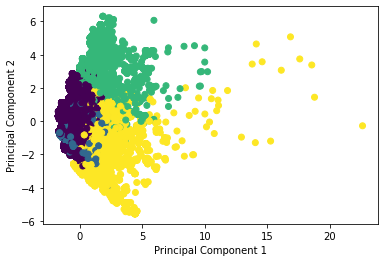

In [307]:
X_3_pca = pca.transform(X_3)
plt.scatter(X_3_pca[:,0], X_3_pca[:,1], c=preds, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
plt.show()

In [480]:
X_3_pca = pca.transform(X_3)
plt.scatter(X_3_pca[:,0], X_3_pca[:,1], c=preds, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
plt.show()

ValueError: X has 76 features, but PCA is expecting 82 features as input.

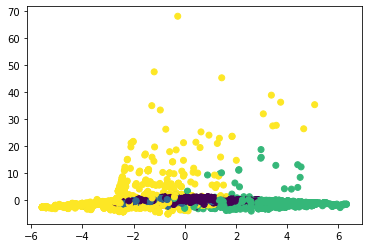

In [308]:
X_3_pca = pca.transform(X_3)
plt.scatter(X_3_pca[:,1], X_3_pca[:,2], c=preds, cmap='viridis', marker='o')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
plt.show()

In [309]:
df_3['Cluster']=model.labels_

In [310]:
df_3

,Severity,living_area,sqft_class_code,ext_cond_list_code,year_built_class_code,"building_subtypology_Garage, 1915-1949","building_subtypology_Multi-Family (2 units), 1915-1949","building_subtypology_Multi-Family (2 units), 1950-1979","building_subtypology_Multi-Family (2 units), 1980-present","building_subtypology_Multi-Family (2 units), Pre-1915",...,ac_C,ac_D,ac_N,flood_f,flood_t,stormwater_f,stormwater_t,latitude,longitude,Cluster
0,5.000000,3109.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,42.31465,-71.09318,0
1,8.000000,2300.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,42.35761,-71.06857,0
2,5.000000,3843.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,42.37484,-71.06004,3
3,5.000000,1200.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,42.32572,-71.08477,0
4,5.000000,2623.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,42.35913,-71.13683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25532,5.222222,2356.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,42.26072,-71.11465,3
25533,5.000000,3042.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,42.30670,-71.12455,3
25534,4.666667,3116.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,42.28745,-71.13991,0
25535,5.769231,5364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,42.33669,-71.08429,2


In [311]:
df_3.Cluster.value_counts()

0    15256
3     4419
2     3056
1     2806
Name: Cluster, dtype: int64

In [312]:
df_3.groupby('Cluster')['latitude'].mean()

Cluster
0    42.312907
1    42.289870
2    42.353510
3    42.323332
Name: latitude, dtype: float64

In [313]:
df_3.groupby('Cluster')['longitude'].mean()

Cluster
0   -71.088271
1   -71.118251
2   -71.054555
3   -71.092451
Name: longitude, dtype: float64

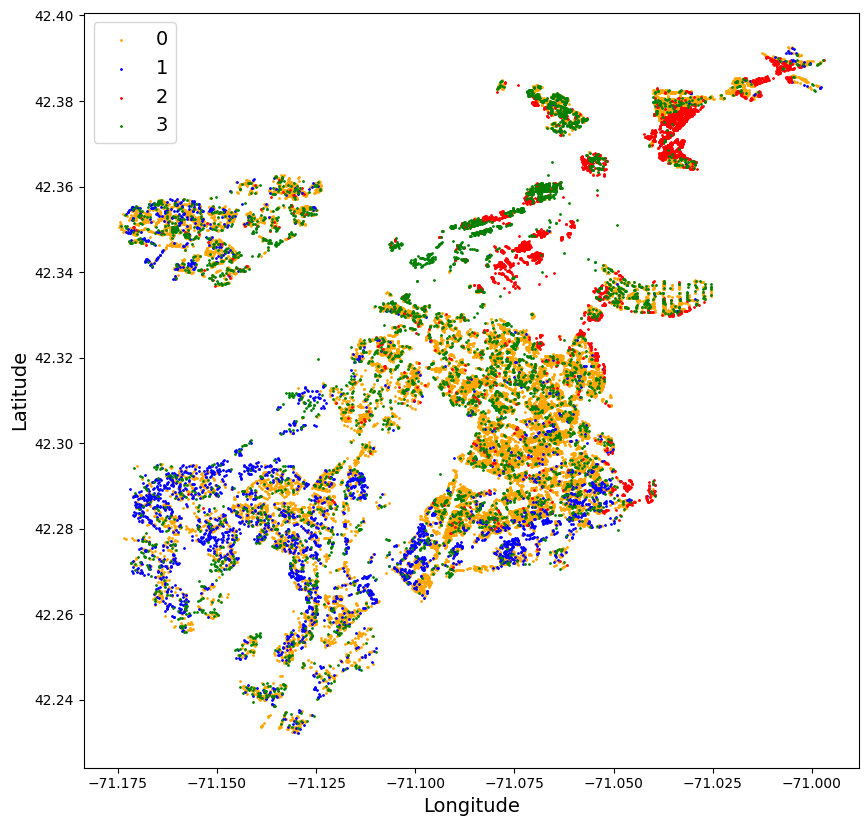

In [386]:
plt.figure(figsize=(10, 10), dpi=100)
for clus,color in zip(range(4),('orange','blue','red','green')):
    plt.scatter(df_3.loc[df_3.Cluster == clus, 'longitude'],df_3.loc[df_3.Cluster == clus, 'latitude'],c=color,s=1,label=clus)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.legend(fontsize=14)
plt.savefig('cluster.png')
plt.show()

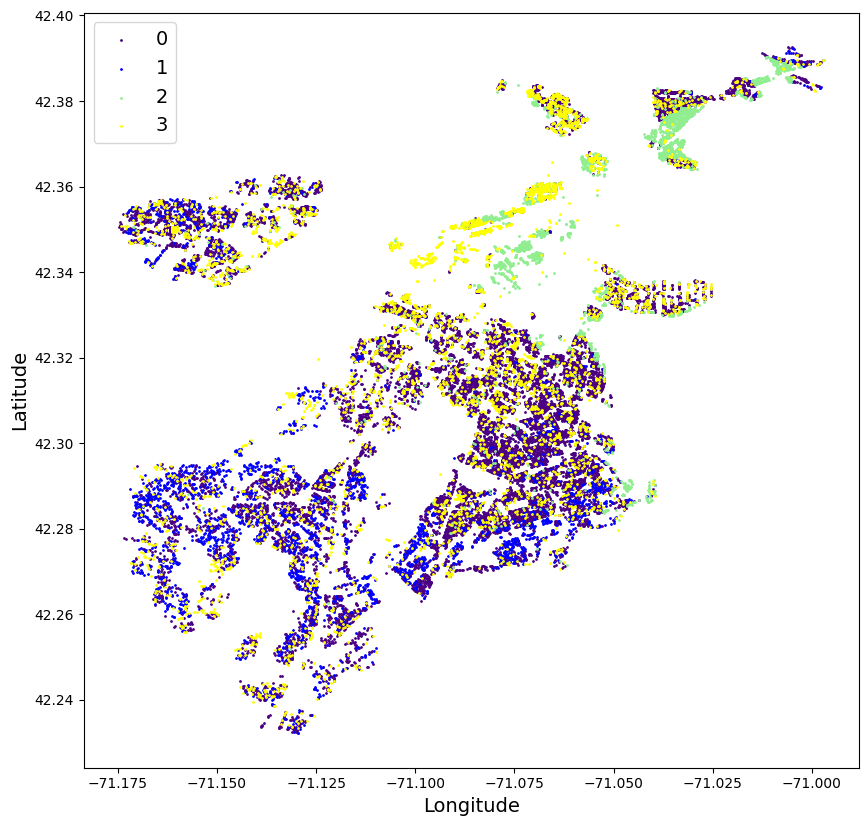

In [479]:
plt.figure(figsize=(10, 10), dpi=100)
for clus,color in zip(range(4),('indigo','blue','lightgreen','yellow')):
    plt.scatter(df_3.loc[df_3.Cluster == clus, 'longitude'],df_3.loc[df_3.Cluster == clus, 'latitude'],c=color,s=1,label=clus)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.legend(fontsize=14)
plt.savefig('cluster_v2.png')
plt.show()

In [427]:
df_3 = df_3.merge(pd.read_csv('byaddress_v2_2.csv')[['census_tract_number']],left_index=True,right_index=True)

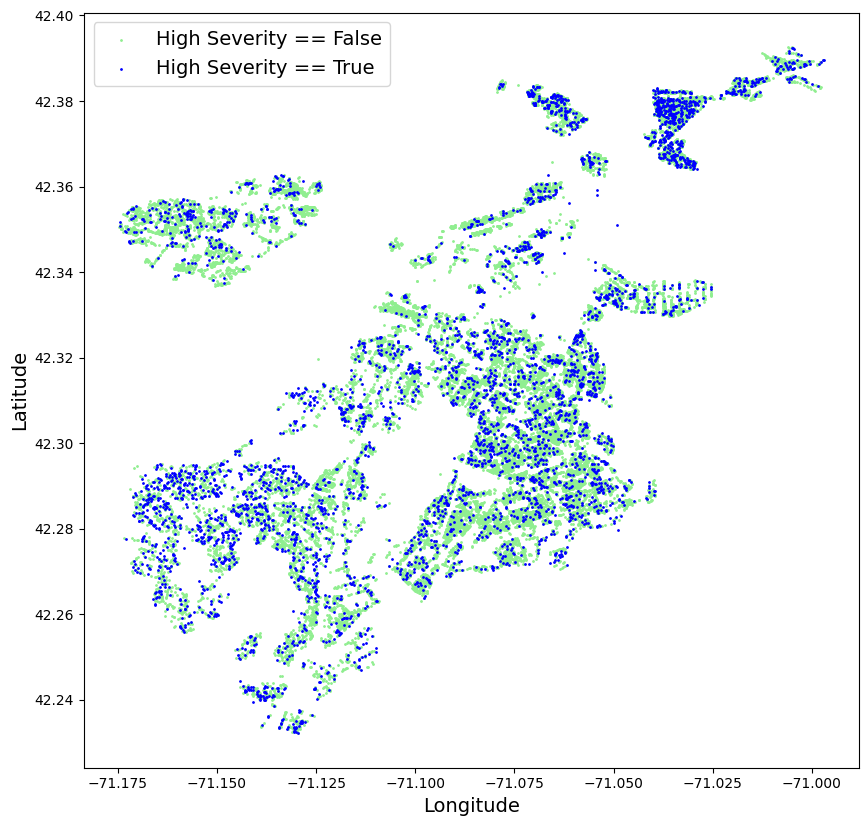

In [433]:
plt.figure(figsize=(10, 10), dpi=100)
for cat,lab,m, color in zip(range(2),('High Severity == False','High Severity == True'),('.','x'),('lightgreen','blue')):
    plt.scatter(df_3.loc[(df_3.Severity > 7) == cat, 'longitude'],df_3.loc[(df_3.Severity > 7) == cat, 'latitude'],c=color,s=1,label=lab)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.legend(fontsize=14)
plt.savefig('severity_class_map.png')
plt.show()

In [385]:
df_3.columns

Index(['Severity', 'living_area', 'sqft_class_code', 'ext_cond_list_code',
       'year_built_class_code', 'building_subtypology_Garage, 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1950-1979',
       'building_subtypology_Multi-Family (2 units), 1980-present',
       'building_subtypology_Multi-Family (2 units), Pre-1915',
       'building_subtypology_Multi-Family (3 units), 1915-1949',
       'building_subtypology_Multi-Family (3 units), 1950-1979',
       'building_subtypology_Multi-Family (3 units), 1980-present',
       'building_subtypology_Multi-Family (3 units), Pre-1915',
       'building_subtypology_Multi-Family (31-99 units), 1915-1949',
       'building_subtypology_Multi-Family (31-99 units), 1950-1979',
       'building_subtypology_Multi-Family (31-99 units), 1980-present',
       'building_subtypology_Multi-Family (31-99 units), Pre-1915',
       'building_subtypology_Multi-Family (4-6 un

In [55]:
df_building.corr()['Severity']

year built     0.018328
land_sf        0.001462
gross_area    -0.015744
living_area   -0.012078
sqft          -0.012125
num_floors    -0.045816
num_bldgs           NaN
units_res     -0.019192
Severity       1.000000
Index_Sum      0.004332
Cluster        0.043516
Name: Severity, dtype: float64

In [57]:
df_building_clusters=df_building.groupby('Cluster').mean()

In [58]:
df_building_clusters

,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,Severity,Index_Sum
Cluster,,,,,,,,,,
0,1904.980522,3030.307025,5060.250992,3567.180652,3567.593003,3.050678,1.0,3.090557,5.538486,34.460999
1,1964.000000,174782.000000,445701.000000,398510.000000,398510.000000,29.000000,1.0,273.000000,9.000000,54.000000
2,1919.260299,5162.202938,3505.615668,2091.035252,2091.380930,1.911127,1.0,1.458472,5.702842,18.672931
3,1932.331707,11364.204878,26085.180488,21995.541463,21995.541463,4.146341,1.0,29.356098,5.547769,74.078049
